# Actividad NLP 1.0 | Creación de Diccionario
Joel Isaias Solano Ocampo | A01639289

## Contador de palabras:

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

* URL del libro que deseas descargar desde Project Gutenberg:

In [ ]:
url = "https://www.gutenberg.org/ebooks/521.txt.utf-8"

* Descargar el contenido del libro:

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
book_text = soup.get_text()

* Crea la nube de palabras:


In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(book_text)

* Muestra la nube de palabras:

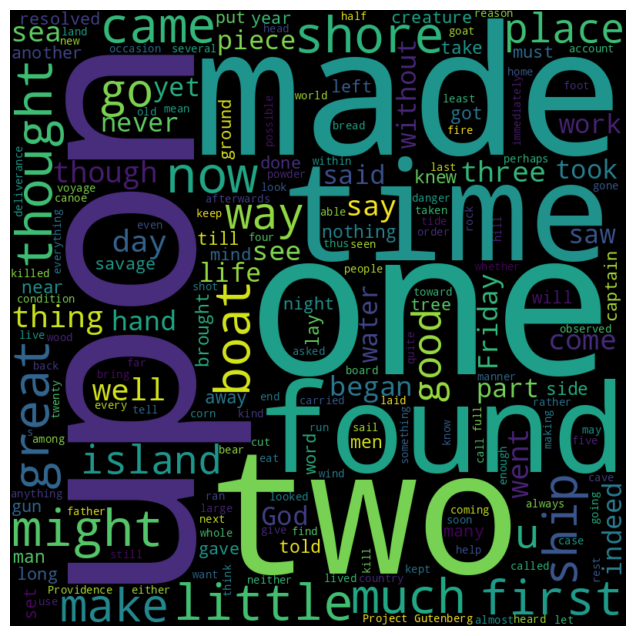

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Carga el diccionario y divide el texto en palabras individuales:

In [ ]:
words = book_text.split()

* Corrige cada palabra en la lista de palabras:


In [ ]:
words_count = Counter(words)

* Ordena las palabras por frecuencia:

In [ ]:
sorted_words = sorted(words_count.items(), key=lambda x: x[1], reverse=True)

* Crea una lista de palabras y una lista de frecuencias:

In [ ]:
words_list = [word[0] for word in sorted_words]
freq_list = [word[1] for word in sorted_words]

* Crea el histograma a partir del diccionario:

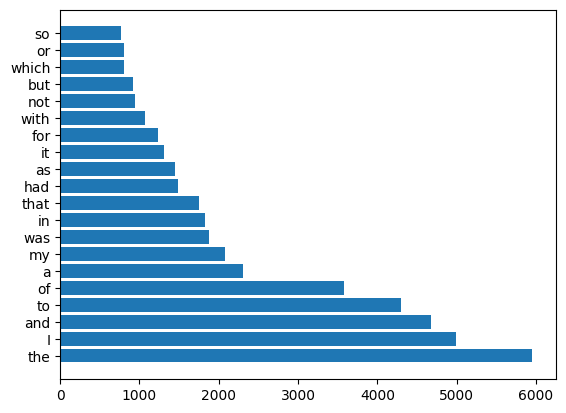

In [ ]:
plt.barh(list(words_list[:20]), list(freq_list[:20]))
plt.show()

## Bonus:

In [ ]:
import difflib
# !pip install Levenshtein
from Levenshtein import distance

* Función para crear un diccionario de palabras:

In [ ]:
def create_dictionary(txt):
    return set(re.findall(r'\b\w+\b', txt.lower()))

* Crear el diccionario:

In [ ]:
words_dictionary = create_dictionary(book_text)

* Función para corregir texto usando el diccionario:

In [ ]:
def correct_text(txt, dictionary):
    words = re.findall(r'\b\w+\b', txt.lower())
    corrected_text = list()
    for word in words:
        best_match = difflib.get_close_matches(word, dictionary, n=1, cutoff=0.6)
        if best_match:
            corrected_text.append(best_match[0])
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

* Texto de ejemplo a corregir:

In [ ]:
example_text = book_text[:500]
print(example_text)

﻿The Project Gutenberg eBook of The Life and Adventures of Robinson Crusoe
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are loc


In [ ]:
print(correct_text(example_text, words_dictionary))

the project gutenberg ebook of the life and adventures of robinson crusoe this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are lock


* Función para la distancia Levenshtein:

In [ ]:
def levenshtein_distance(txt_1, txt_2):
    return distance(txt_1, txt_2)

 * Obtenemos la distancia:

In [ ]:
distance = levenshtein_distance("Robinson", "Crusoe")
print('Levenshtein Distance:', distance)

Levenshtein Distance: 6
